## Algorithm: Mango
Input: n (n is an integer)

Begin:

  if (n%2 == 0)

    return (n/2)

  else

    return (n+1)/2

end

Translate the Mango algorithm to an quantum mango algorithm. That is, code the mango algorithm using quantum gates. Keep n<=4 for simplicity reasons.



In [80]:
#step-1
!pip install qiskit

In [2]:
#step-2
!pip install qiskit-aer

In [ ]:
#step -3 (This was given in assignment -1)

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit  #Importing the QuantumCircuit function from Qiskit. We will use this to create our quantum circuits!
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session

# We will use these functions to run our circuit and visualize its final state
from qiskit.visualization import *

import warnings  # We are using this library to suppress some warning messages
warnings.filterwarnings("ignore")

service = QiskitRuntimeService()
print("Libraries imported successfully!")

### when combining two oracles/functions even and odd based on  if cinditional qubit logic is below

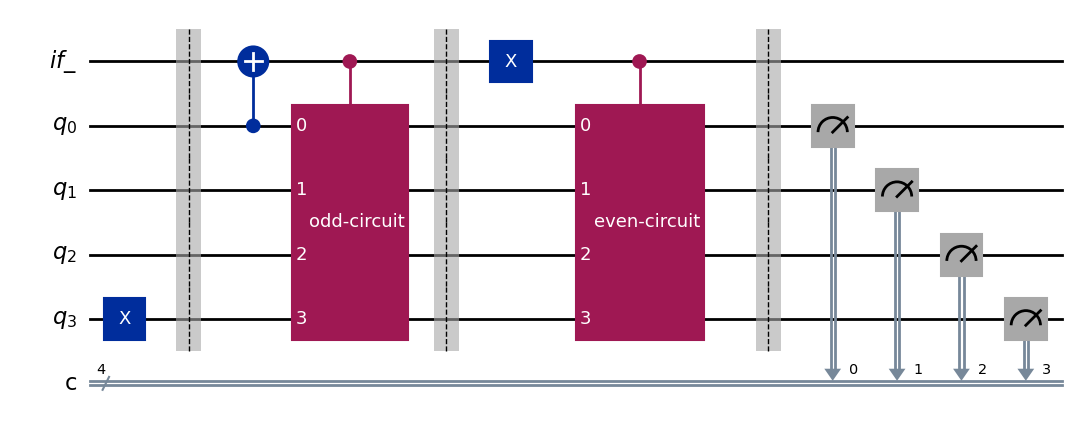

In [ ]:
#LIBRARIES REQUIRED
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit.circuit.library import C3XGate


#DEFINATION OF QUBIT REGUSTERS AND CLASSICAL REGISTERS
qr_if = QuantumRegister(1, name='if_')
qr = QuantumRegister(4, name='q')


#DEFINING CLASSICAL REGISTER
cr = ClassicalRegister(4, 'c')


# CREATING QUANTUM MCIRCUIT "qc_main" WITH 4 CLASSICAL AND 4 QUANTUM REGISTERS DEFINED ABOVE
qc_main = QuantumCircuit(qr_if, qr, cr)


# INPUT MANIPULATIONS USING PAULI-X GATES 

# qc_main.x(qr[0])
# # qc_main.x(qr[1])
# # qc_main.x(qr[2])
qc_main.x(qr[3])



#QUANTUM BARRIER -1
qc_main.barrier()


#APPLYING C-NOT GATE WIRH CONTROL ON QR[0] AND TARGET ON qr_if[0]
qc_main.cx(qr[0], qr_if[0])


#DEFINING THE ODD - QUANTUM CIRCUIT AS qc_odd 
qc_odd = QuantumCircuit(4, name="odd-circuit")


# Quantum gates applied within odd circuit qc_odd to make the action of n+1/2. 
# If 'if_' qubit is set to 1, it activates the odd-circuit 

qc_odd.append(C3XGate(), [0, 1, 2, 3])  # C3X gate acting on all qubits
qc_odd.ccx(0, 1, 2)  # CCX gate with control on q[0] and q[1], target on q[2]
qc_odd.cx(0, 1)  # CNOT gate with control on q[0] and target on q[1]
qc_odd.x(0)  # X gate on q[0]
qc_odd.swap(0, 1)  # SWAP gate between q[0] and q[1]
qc_odd.swap(1, 2)  # SWAP gate between q[1] and q[2]
qc_odd.swap(2, 3)  # SWAP gate between q[2] and q[3]


# CONVERSION OF qc_odd TO A GATE 
gate_odd = qc_odd.to_gate()

# MAKING THE GATE CONTROLLED  BY "if_qubit" WHICH IS A CONDITIONAL QUBIT
gate_controlled_odd = gate_odd.control()


# APPENDING THE CONTROLLED ODD-CIRCUIT TO MAIN QUANTUM CIRCUIT  qc_main
qc_main.append(gate_controlled_odd, [qr_if[0], qr[0], qr[1], qr[2], qr[3]])


#QUANTUM BARRIER -2
qc_main.barrier()


# PAULI - X GATE ON IF_
qc_main.x(qr_if[0])



#EVEN CIRCUIT
qc_even = QuantumCircuit(4, name="even-circuit")


#Quantum gates applied within even  circuit qc_even to make the action of n/2 .  if if_ qubit  is set to 1 after pauli x gate  
qc_even.swap(0, 1)  # SWAP gate between q[0] and q[1]
qc_even.swap(1, 2)  # SWAP gate between q[1] and q[2]
qc_even.swap(2, 3)  # SWAP gate between q[2] and q[3]


# Inorder to Convert qc_odd to a gate
gate_even = qc_even.to_gate()


# Inroder to Make the gate controlled by the if_ qubit
gate_controlled_even= gate_even.control()


# Append the controlled gate to qc_main
qc_main.append(gate_controlled_even,[qr_if[0], qr[0], qr[1], qr[2], qr[3]])


qc_main.barrier()


#MEASUREMENTS
qc_main.measure(qr[0],cr[0])
qc_main.measure(qr[1],cr[1])
qc_main.measure(qr[2],cr[2])
qc_main.measure(qr[3],cr[3])


#DRAW CIRCUIT FOR VISUALIZATION PURPOSES
qc_main.draw(output='mpl')

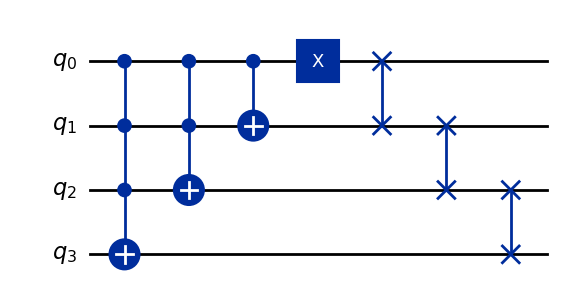

In [76]:
# INSIDE  ODD-CIRCUIT  ORACLE DEFINED ABOVE
qc_odd.draw()

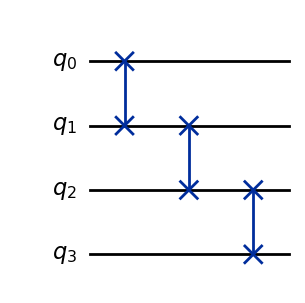

In [77]:
#INSIDE THE  EVEN CIRCUIT ORACLE DEFINED  ABOVE

qc_even.draw()

### STEP -3  TRANSPILATION 
**************************************************************************************************
##### TRANSPILATION OF QUANTUM CIRCUIT TO SUIT ISA (INSTRUCTION SET ARCHITECTURE BEFORE MEASUREMENT)

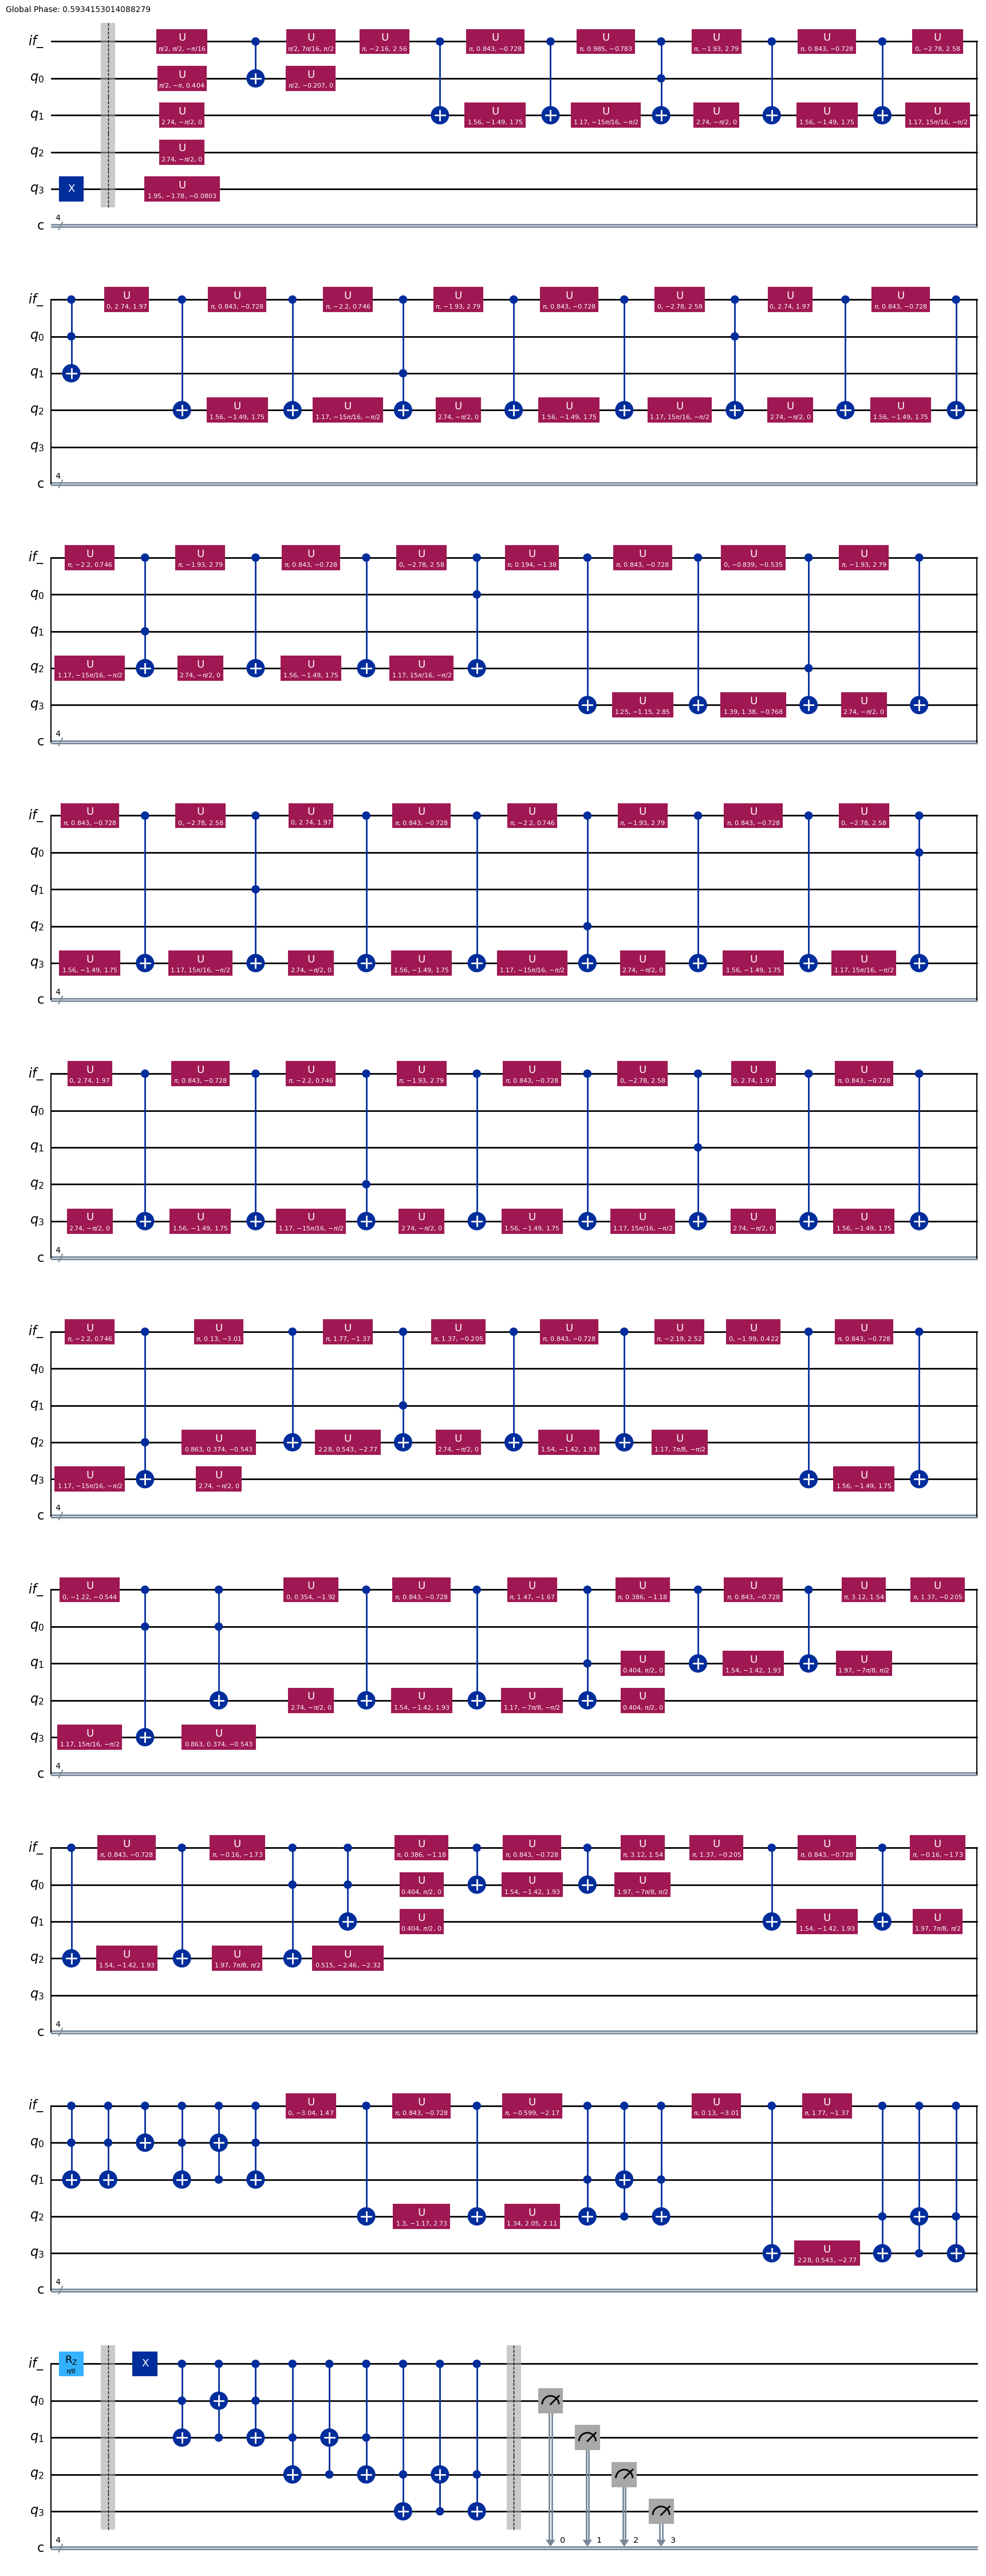

In [78]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target
pm = generate_preset_pass_manager(target=target, optimization_level=3)

circuit_isa = pm.run(qc_main)
circuit_isa.draw(output="mpl", idle_wires=False, style="iqp")


FINAL STEP :- MEASUREMENT 

base_primitive._run_primitive:INFO:2024-03-23 17:54:37,823: Submitting job using options {'optimization_level': 1, 'resilience_level': 0, 'transpilation': {'skip_transpilation': False, 'optimization_settings': {'level': 1}}, 'resilience': {'level': 0}, 'execution': {'shots': 4000, 'init_qubits': True}, 'environment': {'log_level': 'WARNING'}, 'simulator': {'noise_model': Unset, 'seed_simulator': Unset, 'coupling_map': Unset, 'basis_gates': Unset}}


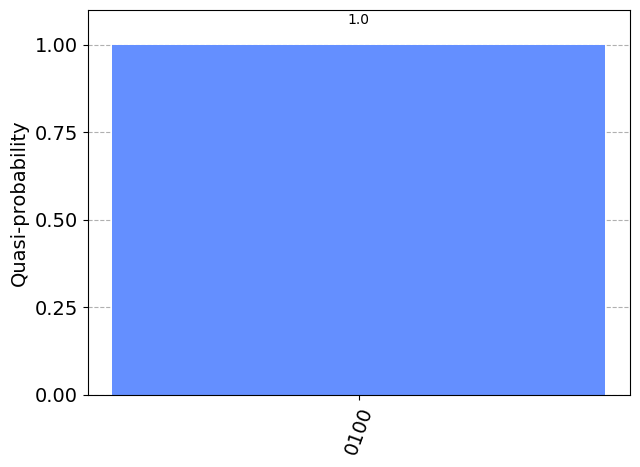

In [79]:
backend = service.get_backend('ibmq_qasm_simulator')

with Session(service = service, backend = backend) as session:
    sampler = Sampler()
    job = sampler.run(circuits = circuit_isa)
    
job.result()
plot_histogram(job.result().quasi_dists[0].binary_probabilities())